<a href="https://colab.research.google.com/github/ramazannuraly/final/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
from google.colab import files
uploaded = files.upload()


Saving games.csv to games (3).csv


In [3]:
import io

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [5]:
df = pd.read_csv(io.BytesIO(uploaded['games.csv']))

In [6]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Приводим названия столбцом к нижнему регистру методом rename

In [75]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,crtitic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,,0.01


In [7]:
df = df.rename(columns={"Name": "name", "Platform": "platform", 'Year_of_Release':'year_of_release',
                   'Genre':'genre','NA_sales':'na_sales',
                   'EU_sales':'eu_sales','JP_sales':'jp_sales',
                   'Other_sales':'other_sales','Critic_Score':'crtitic_score','User_Score':'user_score','Rating':'rating'})

In [8]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,crtitic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
df.dtypes


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
crtitic_score      float64
user_score          object
rating              object
dtype: object

In [10]:
df['user_score'] = pd.to_numeric(df['user_score'],errors='coerce')

# Тут я изменяю тип данных в столбце user_score на float64, так как изначально Pandas прочел его как object


In [11]:
df.dropna(subset = ['name'], inplace = True)

# В столбце 'name' 2 пропущенных значения, это 0.011967% от всего датафрейма - очень малое,
# так что можем себе позволить удалить эти строки, сильно не повлияют на общую картину.
# В столбцах 'platform','genre','na_sales', 'eu_sales', 'jp_sales', 'other_sales' нет пропущенных значений,
# что может не радовать

# В столбце 'year_of_release' 269 пропущенных значений NaN, это 1.6% процент от общего датафрейма, сразу их удалять нельзя.


In [12]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

# В столбце 'crtitic_score' целых 8576 пропущенных значений NaN, больше половины даты пропущены ибо их просто нет,
# удалять конечно всё не будем - потеряем более 50 процента полезной информации.
# Причииной ошибка, считаю, не все игры удается оценивать критикам, это все - неслучайные пропуски.


In [12]:
df['rating'] = df['rating'].fillna(value = '')

# Рейтинг могут получать не все игры - их слишком много(аналогия с ситуацией 'critic_score'), и возможно не все достойны рейтинга.
# Этот столбец - наша качественная переменная, и пропуски в них скорее неслучайны - поэтому лучше их заменить пустой строкой.


In [13]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,crtitic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,


In [14]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Находим суммарные продажи во всех регионах

# Ошибки в данных устранены. Данные подготовлены к дальнейшему анализу.


# Еще что стоит упомянуть - я по крайней мере не нашел дубликатов в этом датафрейме.
# Возвращаются нули, данные пригодны для исследования.


In [15]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,crtitic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,,0.01


In [16]:
df['year_of_release'].value_counts()


2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [16]:
df.groupby('year_of_release')['name'].count().sort_values(ascending = False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

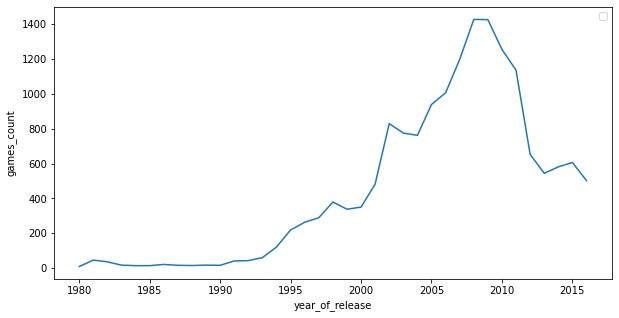

In [17]:
number_of_games_each_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(10,5))
sns.lineplot(data=number_of_games_each_year)
plt.xlabel("year_of_release")
plt.ylabel("games_count")
plt.legend('')


# Количество игр выпускавшихся в период с 1980 года до 1990 очень мала, большой значимости они для нас не представляют,
# поэтому могу предполагать, важны лишь данные с 1990 до 2016 года.

# На этой стадии сразу можно заметить основную очевидную тенденцию - количество выпускаемых на продажу игр растет каждым годом, \
# пика достигает в 2008, далее постепенно убывает

# Причанами спада, по моему мнению являются - насыщение рынка приставок,
# утрата издательского контроля, утрата доверия потребителей, рост игр для компьютеров и многие другие причины


In [18]:
df.groupby('year_of_release')['total_sales'].sum().sort_values(ascending = False)


year_of_release
2008    671.50
2009    658.82
2007    604.75
2010    590.13
2006    517.71
2011    507.58
2005    457.82
2004    418.68
2002    394.97
2013    361.24
2003    357.54
2012    355.84
2014    331.53
2001    331.46
2015    267.98
1998    256.31
1999    251.11
2000    201.66
1997    201.07
1996    199.15
2016    129.94
1995     88.12
1994     79.23
1992     76.16
1989     73.45
1985     53.95
1984     50.35
1990     49.37
1988     47.21
1993     45.99
1986     37.08
1981     35.68
1991     32.23
1982     28.88
1987     21.70
1983     16.80
1980     11.38
Name: total_sales, dtype: float64

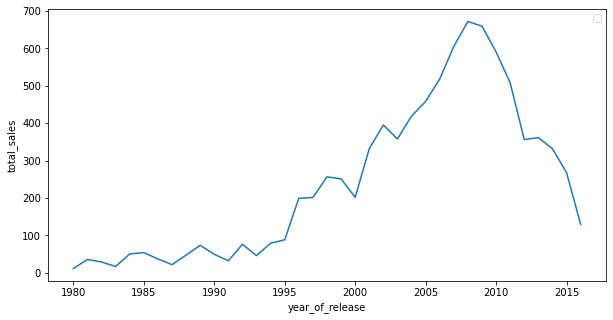

In [19]:
total_sales_by_year = df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
plt.figure(figsize=(10,5))
sns.lineplot(data=total_sales_by_year)
plt.xlabel("year_of_release")
plt.ylabel("total_sales")
plt.legend('')


In [20]:
top_7 = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(8)
print(top_7)


# С начала 1996 до 2016 (период ровно в 20 лет) общие продажи не были меньше 100 млн долларов.
# Явный скачок в индустрии начался в 1996 и достиг пика в 2008.


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
Name: total_sales, dtype: float64


In [21]:
top_13_pivot = df[df['total_sales'] > 10].pivot_table(index = ['platform'], columns = 'year_of_release',
values = 'total_sales', aggfunc = 'sum')
top_13_pivot = top_13_pivot.fillna('')
print(top_13_pivot)

# NES, GB, SNES, первый PS, N64 были популярны до 21 века(их продажи сейчас на нуле), позже их заменили Wii, X360,
# новые поколения PS и так далее. Характерный период смены популярных платформ виднеется аж в 1996 году,
# и так продолжалось до 2008 года. Повлиял ли мировой кризис в 2008, вопрос?
# Но нам очевидно - с 2008 продажи постепенно снижались, конкурентоспособных платформ так же стало меньше - пришли монополисты, в лице PlayStation & Xbox.


year_of_release   1984   1985   1988  1989  ...   2012   2013   2014   2015
platform                                    ...                            
3DS                                         ...          14.6  11.68       
DS                                          ...                            
GB                                    48.4  ...                            
GBA                                         ...                            
N64                                         ...                            
NES              28.31  40.24  17.28        ...                            
PS                                          ...                            
PS2                                         ...                            
PS3                                         ...  13.79  21.05              
PS4                                         ...                12.62  14.63
SNES                                        ...                            
Wii         

In [22]:
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2005)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total


In [23]:
top_5_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)


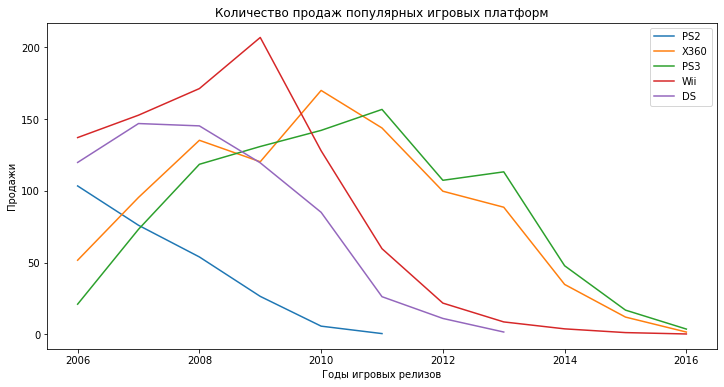

In [25]:
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2005)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

top_5_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,df)['total_sales'], label=i)
    plt.legend()

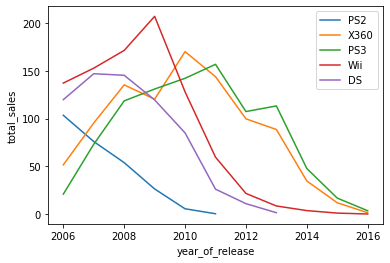

In [26]:
for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,df)['total_sales'], label=i)
    plt.legend()


# Ссылаясь на данные, которые я изучил выше, для того, чтобы избежать значимого искажения распределения по платформам
# в 2016 году, надо рассматривать период с 2008 до 2016. Многие популярные платформы с 1980,
# сейчас уже не выпускают игры - и данные о них не столь важны для рекламной кампании 2017 года.
# Данные с 2008 хорошо подойдут для анализа наших целей - какие компании с 2008 не столь успешны,
# а какие только набирают обороты.


In [27]:
data = df[df['year_of_release'] >= 2010]

# data - новый датасет, который я определил. Дальнейшие работы только с ним.


In [28]:
print(data['year_of_release'].value_counts())


2010    1255
2011    1136
2012     653
2015     606
2014     581
2013     544
2016     502
Name: year_of_release, dtype: Int64


In [29]:
data.groupby('year_of_release')['total_sales'].sum().sort_values(ascending = False)


year_of_release
2010    590.13
2011    507.58
2013    361.24
2012    355.84
2014    331.53
2015    267.98
2016    129.94
Name: total_sales, dtype: float64

In [30]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(8)


platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
Name: total_sales, dtype: float64

In [31]:
new_pivot = data[data['total_sales'] > 5].pivot_table(index = ['platform'], columns = 'year_of_release',
values = 'total_sales', aggfunc = 'sum')
new_pivot = new_pivot.fillna('')
new_pivot


year_of_release,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,
3DS,,23.46,19.07,19.82,19.23,,7.14
DS,15.13,,8.06,,,,
PC,,,5.14,,,,
PS3,34.88,45.76,28.4,42.73,5.27,,
PS4,,,,,32,38.36,12.99
Wii,38.48,10.12,6.76,,,,
WiiU,,,5.23,,7.09,,
X360,63.91,37.05,33.84,35.69,,,
XOne,,,,,10.73,7.39,


In [32]:
data['name'].value_counts()


# Для построения диаграммы размаха (ящик с усами) нужно определить с чем имеим работу.
# Нам нужно построить график по глобальным продажам каждой игры и разбивкой по платформам.
# При 16000 строк данных - у нас 5245 игры, с чем будем работать, некоторые из игр повторяются, и
# сумма глобальных продаж одной игры на наши выводы возможно будут влиять


LEGO Marvel Super Heroes                 9
FIFA 14                                  9
FIFA 15                                  8
The LEGO Movie Videogame                 8
Lego Batman 3: Beyond Gotham             8
                                        ..
Invizimals: The Lost Kingdom             1
PriPara Mezase! Idol Grand Prix No.1!    1
Airline Tycoon 2                         1
Voodoo Chronicles: First Sign            1
Etrian Odyssey V                         1
Name: name, Length: 3282, dtype: int64

In [33]:
data['platform'].value_counts()


PS3     889
X360    680
3DS     512
DS      507
PSP     500
PC      479
Wii     450
PSV     429
PS4     392
XOne    247
WiiU    147
PS2      45
Name: platform, dtype: int64

In [34]:
data.groupby('platform')['name'].count().sort_values(ascending = False)


# Эти данные тоже очень привлекательные. В то время как у DS с 2008 года было выпущено 1402 игр,
# у DC и XB всего одна - возможно при срезе данных игры выпущенные на этих платформах, до 2008 года,
# были утеряны. Это значительный выброс при показателе 1, поэтому их лучше не допускать на дальнейший анализ датасета.

# Перспективные платформы на 2017 год - PS3, X360, PS4, 3DS, XOne. Разница продаж на актуальный период очень высокий,
# поэтому можно считать их действительно хорошими.
# Но нужно учесть тот факт, Play Station - одна компания, и более поздные релизы платформ данной компании
# нам могут помочь сделать ставку на PS4 - последние годы неплохие продажи, и он явно будет расти.


platform
PS3     889
X360    680
3DS     512
DS      507
PSP     500
PC      479
Wii     450
PSV     429
PS4     392
XOne    247
WiiU    147
PS2      45
Name: name, dtype: int64

In [35]:
data = data[data['platform'] != 'DC' ]
data = data[data['platform'] != 'XB' ]


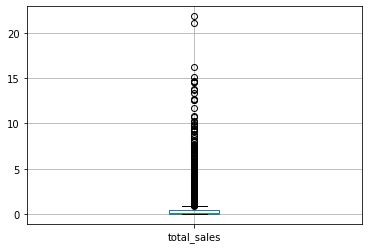

In [36]:
data.boxplot('total_sales')


# Разница в продажах очень велика - наше медианное значение находиться слишком далеко от значимой части значений,
# что подтверждает не все игры успешно продаются.


In [37]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending = False)


platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: total_sales, dtype: float64

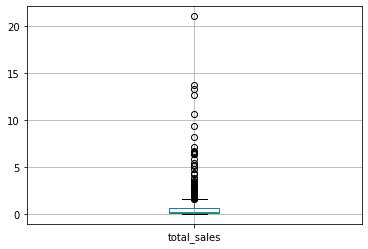

In [38]:
data_ps3 = data[data['platform'] == 'PS3']
data_ps3.boxplot('total_sales')


In [39]:
data.groupby('platform')['total_sales'].mean().sort_values(ascending = False)


# Значительной разницы в средних продажах игр нет, но это ощутимо при больших данных.
# И показывает стабильность продаж одной конкретной игры.

platform
X360    0.809426
PS4     0.801378
PS3     0.661125
XOne    0.645020
WiiU    0.559116
3DS     0.503535
Wii     0.495489
PC      0.254614
DS      0.244083
PS2     0.135333
PSP     0.128100
PSV     0.125431
Name: total_sales, dtype: float64

In [40]:
list_of_top5 = ['PS2','X360','PS3','Wii','DS']
df_top_5_platforms = df[df['platform'].isin(['PS2','X360','PS3','Wii','DS'])]
df_top_5_platforms = df_top_5_platforms[df_top_5_platforms['total_sales']<1.4]

Text(0, 0.5, 'Глобальные продажи')

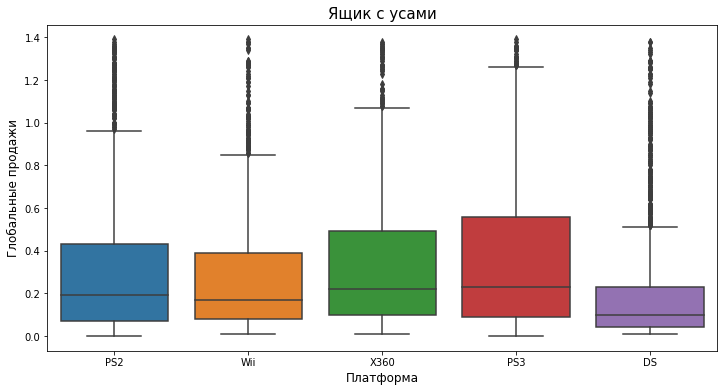

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)


In [42]:
data_ps3 = data[data['platform'] == 'PS3']


# Выбираю Play Station 3 как самую популярную платформу(самые высокие продажи)


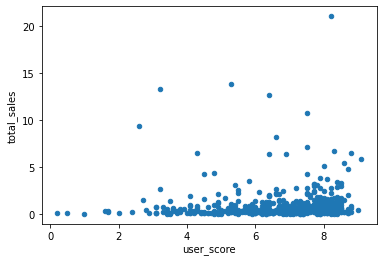

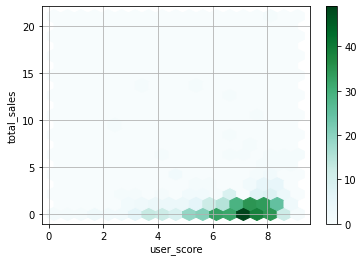

In [43]:
data_ps3.plot(x='user_score', y='total_sales', kind='scatter')
data_ps3.plot(x='user_score', y='total_sales', kind='hexbin',gridsize=18, sharex=False, grid=True)


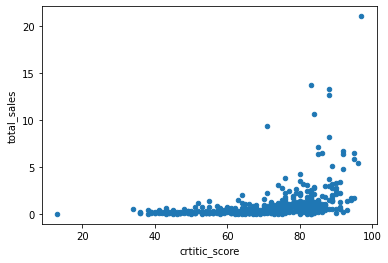

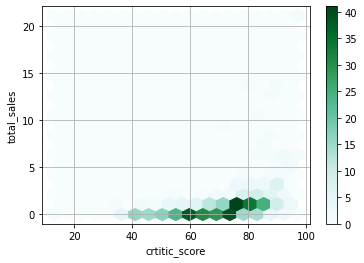

In [45]:
data_ps3.plot(x='crtitic_score', y='total_sales', kind='scatter')
data_ps3.plot(x='crtitic_score', y='total_sales', kind='hexbin',gridsize=18, sharex=False, grid=True)


# Глядя на графики можно сказать, сильного влияния на продажи оценки критиков и пользователей не несет.
# Высокая плотность продаж находиться близким к нашим средним и медианным значениям - этому соответсвует
# score критиков и пользователей в районе от 6 до 8.
# Рейтинг пользователей никак не влияет на продажи, что подтвердит наше кореляционное значение далее.
# А зависимость продаж игры и оценки критиков есть, но не столь очевидная. В важности оценок критики побеждают пользователей :).
# Чем выше значение рейтинг критиков, тем хорошо для игры.


In [46]:
data_ps3['crtitic_score'].corr(data_ps3['total_sales'])


0.40059409352022496

In [47]:
data_ps3['user_score'].corr(data_ps3['total_sales'])


# Корреляция в 0,42 говорит о наличии связи, однако не слишком сильной.
# А связи между пользовательским рейтингом и глобальными продажами - почти что нет, очень малое значение близкий к нулю,
# что подтверждает оценки пользователей никак не влияют на продажу.


0.06509241630476506

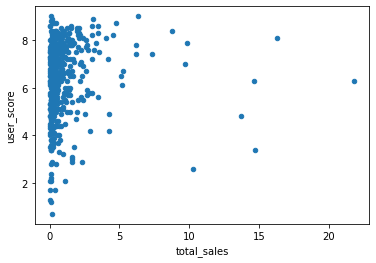

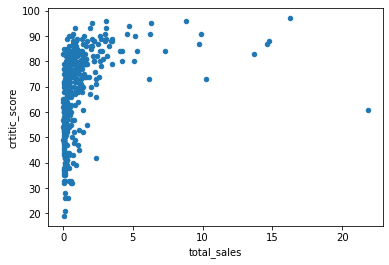

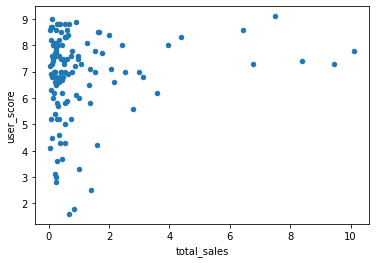

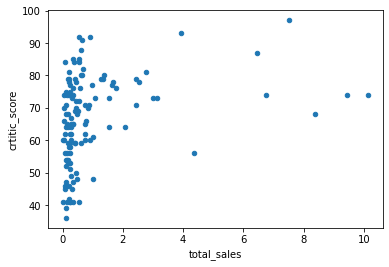

In [48]:
data_x360 = data[data['platform'] == 'X360']
data_x360.plot(x='total_sales', y='user_score', kind='scatter')
data_x360.plot(x='total_sales', y='crtitic_score', kind='scatter')
data_wii = data[data['platform'] == 'Wii']
data_wii.plot(x='total_sales', y='user_score', kind='scatter')
data_wii.plot(x='total_sales', y='crtitic_score', kind='scatter')


In [49]:
data_x360['crtitic_score'].corr(data_x360['total_sales'])


0.3400641581317536

In [50]:
data_wii['crtitic_score'].corr(data_wii['total_sales'])


0.3105877104820997

In [51]:
data_x360['user_score'].corr(data_x360['total_sales'])


0.06603518173931955

In [52]:
data_wii['user_score'].corr(data_wii['total_sales'])


# Соотнеся к значениям других 2 не менее популярных платформ видим во многом одну и то же картину,
# что означает - оценки пользователей никак не несут информативной связи(каждый человек оценивает исходя из своего опыта;
# пользователей много - сильный разброс). Обстоят дела лучше у оценок критиков - тут они имеют значения,
# чем больше показатель тем хорошо будет для успешности игры


0.14715977707531702

In [53]:
data.groupby('genre')['name'].count().sort_values(ascending = False)


# Смотря на эту группировку можно сказать, что жанр 'Action' - самый популярный, далее Misc & Sports со
# схожей частотой, и самый редкий - игры с жанром Платформер


genre
Action          1495
Misc             576
Sports           575
Role-Playing     568
Adventure        563
Shooter          410
Racing           237
Simulation       217
Fighting         199
Strategy         170
Platform         153
Puzzle           114
Name: name, dtype: int64

In [54]:
data.groupby('genre')['total_sales'].sum().sort_values(ascending = False)


# Самым популярным и прибыльным остается жанр - Action, далее не менее прибыльные Shooter,
# Sports & Role-Playing. Можно заметить, что не все популярные игры - столь прибыльные.
# Не самые прибыльные жанры - puzzle & стратегия, и они выделяются своими низкими продажами.
# А top-1 не смотря ни на что, по всем показателям держит жанр Action


genre
Action          673.09
Shooter         479.74
Sports          328.39
Role-Playing    315.28
Misc            234.56
Racing          122.68
Platform        119.72
Fighting         81.59
Simulation       71.75
Adventure        61.00
Strategy         35.84
Puzzle           20.60
Name: total_sales, dtype: float64

In [55]:
data.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()


platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64

In [56]:
data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()


platform
PS3     213.60
X360    163.41
PS4     141.09
PC       68.82
Wii      65.91
Name: eu_sales, dtype: float64

In [57]:
data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()


# Можно сразу заметить, игры в северной Америке продаются очень хорошо - продажи очень высокие,
# основная масса аудиторий находиться там.
# Сравнительно в Европе продажи ниже, хотя население людей больше в Европе - спрос на игры заметно ниже.
# А цифры Японии ожидаемы, на такую маленькую страну неплохие показатели продаж.


platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: jp_sales, dtype: float64

In [58]:
data.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head()
data.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head()
data.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head()


# Тут уже дела куда интереснее. По жанрам можно сразу определить интересы людей в конкретном месте.
# Ожидаемо по популярности жанров на таких два больших континента Европы и Америка,
# схожие предпочтения, в то время как, у Японии свои вкусы. Там людям более интересно жанр role-playing и adventure.

# Япония — третий по величине рынок видеоигр в мире. У них своя индустрия, развитие и независимая технология разработки игр.
# Предпочтения игр тоже разное: влияют много факторов, такие как, культура и менталитет, и множество других.


genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67
Name: jp_sales, dtype: float64

In [59]:
data.groupby('crtitic_score')['jp_sales'].sum().sort_values(ascending = False).head(10)


crtitic_score
88.0    8.45
78.0    7.93
77.0    6.02
68.0    5.46
85.0    5.08
86.0    5.07
80.0    4.93
71.0    4.83
74.0    4.41
83.0    4.41
Name: jp_sales, dtype: float64

In [60]:
data['rating'].value_counts()


# In[50]:


        2164
E        938
T        847
M        719
E10+     603
EC         5
RP         1
Name: rating, dtype: int64

In [61]:
data.groupby('crtitic_score')['crtitic_score'].sum().sort_values(ascending = False).head(10)


crtitic_score
80.0    6960.0
74.0    6882.0
77.0    6468.0
79.0    5925.0
83.0    5810.0
75.0    5775.0
76.0    5624.0
82.0    5576.0
78.0    5304.0
81.0    5265.0
Name: crtitic_score, dtype: float64

In [62]:
data['genre'].value_counts()

# У нас в общем 12 жанров.


Action          1495
Misc             576
Sports           575
Role-Playing     568
Adventure        563
Shooter          410
Racing           237
Simulation       217
Fighting         199
Strategy         170
Platform         153
Puzzle           114
Name: genre, dtype: int64

In [63]:
data_action = data[data['genre'] == 'Action']
data_role_playing = data[data['genre'] == 'Role-Playing']
data_adventure = data[data['genre'] == 'Adventure']


In [64]:
print('genre Action')
print("Дисперсия user_score ",np.var(data_action['user_score']))
print('Стандартное отклонение user_score',np.std(data_action['user_score']))
print("Дисперсия crtitic_score ",np.var(data_action['crtitic_score']))
print('Стандартное отклонение crtitic_score',np.std(data_action['crtitic_score']))


genre Action
Дисперсия user_score  1.8477725137227088
Стандартное отклонение user_score 1.3593279640037972
Дисперсия crtitic_score  181.7362844811262
Стандартное отклонение crtitic_score 13.480960072677547


In [65]:
print("genre Role-Playing")
print("Дисперсия user_score ",np.var(data_role_playing['user_score']))
print('Стандартное отклонение user_score',np.std(data_role_playing['user_score']))
print("Дисперсия crtitic_score ",np.var(data_role_playing['crtitic_score']))
print('Стандартное отклонение crtitic_score',np.std(data_role_playing['crtitic_score']))


genre Role-Playing
Дисперсия user_score  1.4450073335706648
Стандартное отклонение user_score 1.2020845783765237
Дисперсия crtitic_score  146.66532333064632
Стандартное отклонение crtitic_score 12.110545955102367


In [66]:
print("Genre Adventure")
print("Дисперсия user_score ",np.var(data_adventure['user_score']))
print('Стандартное отклонение user_score',np.std(data_adventure['user_score']))
print("Дисперсия crtitic_score ",np.var(data_adventure['crtitic_score']))
print('Стандартное отклонение crtitic_score',np.std(data_adventure['crtitic_score']))


Genre Adventure
Дисперсия user_score  1.711169534457158
Стандартное отклонение user_score 1.308116789303294
Дисперсия crtitic_score  159.4159779614326
Стандартное отклонение crtitic_score 12.62600403775607


In [67]:
data.groupby('rating')['user_score'].mean().sort_values(ascending = False)


rating
        7.009091
T       6.839184
RP      6.800000
M       6.796028
E10+    6.713212
E       6.247016
EC           NaN
Name: user_score, dtype: float64

In [68]:
data.groupby('rating')['crtitic_score'].mean().sort_values(ascending = False)


rating
M       72.708649
E       70.746988
E10+    69.391408
T       68.960000
        67.616667
RP      63.000000
EC            NaN
Name: crtitic_score, dtype: float64

Text(0, 0.5, 'genre - Action')

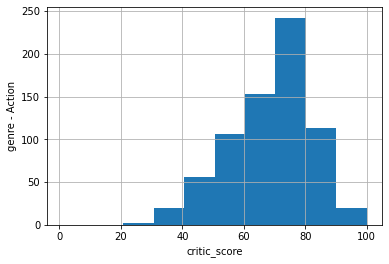

In [69]:
data_action['crtitic_score'].hist(range = (1,100))
plt.xlabel("critic_score")
plt.ylabel("genre - Action")


Text(0, 0.5, 'genre - Action')

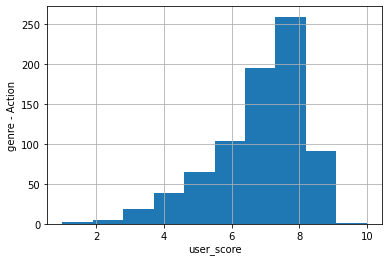

In [70]:
data_action['user_score'].hist(range = (1,10))
plt.xlabel("user_score")
plt.ylabel("genre - Action")


Text(0, 0.5, 'genre - Role - Playing')

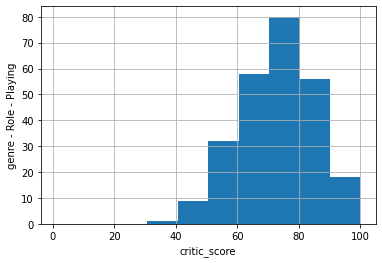

In [71]:
data_role_playing['crtitic_score'].hist(range = (1,100))
plt.xlabel("critic_score")
plt.ylabel("genre - Role - Playing")


Text(0, 0.5, 'genre - Role-playing')

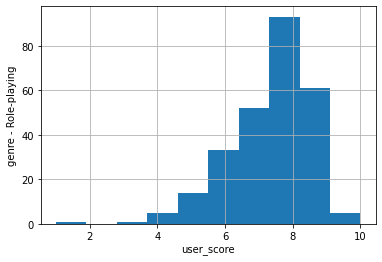

In [72]:
data_role_playing['user_score'].hist(range = (1,10))
plt.xlabel("user_score")
plt.ylabel("genre - Role-playing")


Text(0, 0.5, 'genre - Adventure')

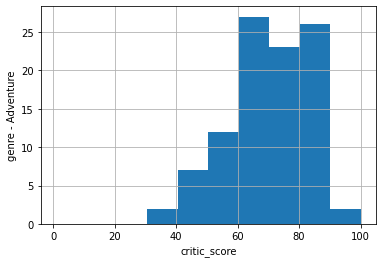

In [73]:
data_adventure['crtitic_score'].hist(range = (1,100))
plt.xlabel("critic_score")
plt.ylabel("genre - Adventure")


Text(0, 0.5, 'genre - Adventure')

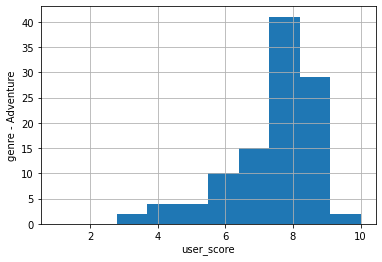

In [74]:
data_adventure['user_score'].hist(range = (1,10))
plt.xlabel("user_score")
plt.ylabel("genre - Adventure")


# Графики очень схожие, что помогает судить их одинаково. Сильного отличия ни у кого нет. Заметна тенденция - оценки пользователей в районе 6 до 8 самые частые, а у критиков от 60 - 70.

# Начиная с подготовки данных до проверки гипотез, проект получился неплохим. Выяснили, что предпочтения игр
# отдельного региона могут быть разными, а оценки пользователей не так сильно влияют на продажи.
# На оценку критиков надо обращать внимание при подготовки данных для рекламной компании.
# Не все данные хороши для анализа в настоящее время.
# Выяснили будущих потенциальных монолистов рынка.
# Игры хорошо продаются, где они хорошо рекламированы.
# Проверили гипотезы, и узнали стандартное отклонение и дисперсию рейтингов игр разных жанров.
# Данные готовы для будущего его использования!

# Что было выполнено в ходе работы:
# Первый шаг - подготовка данных:
#     Заменил названия столбцов методом rename;
#     Преобразовал данные в нужные типы;
#     Проделал работу с пропусками;
#     Выявили причины, которые могли привести к пропускам;
#     Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.
# Второй шаг - проведение исследовательского анализа данных:
#     Узнали сколько игр выпускалось в разные годы.
#     Установили характерный период появляние новых и исчезновение старых платформ.
#     Определили потенциально прибыльных платформ.
#     Построили диаграммы размаха для каждой платформы.
#     Узнали значимость отзывов пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами.
#     Выявили самые прибыльные жанры
# Третий шаг - портрет пользователя каждого региона:
#     Определили:
#     Самые популярные платформы (топ-5).
#     Самые популярные жанры (топ-5).
#     Влияние рейтинга ESRB на продажи в отдельном регионе
# Четвертый шаг - проведение исследования статистических показателей
#     Узнали изменение пользовательского рейтинга и рейтинга критиков в различных жанрах?